<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Ciencia-de-Datos-en-Ciencias-Economicas-con-Python/blob/master/Python_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Utilizando Python en análisis financiero de Bitcoin**


## Extracción de datos

### Carga de librerías necesarias para la extracción de los datos

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

In [2]:
BTC2019 = pdr.DataReader("BTC-USD", start='2018-12-31', end='2019-12-29', data_source='yahoo')

Se crea el objeto Bitcoin 2019 para guardar todos los datos de las cotizaciones del bitcoin entre el intervalo de tiempo que inicia el día 31 de diciembre del 2018 hasta el día 29 de diciembre del 2019.

### Creación del dataframe

In [3]:
df = pd.DataFrame(BTC2019)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439
2019-01-01,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020
2019-01-02,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424
2019-01-03,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211
2019-01-04,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529
...,...,...,...,...,...,...
2019-12-26,7388.302734,7200.386719,7274.799316,7238.966797,22787010034,7238.966797
2019-12-27,7363.529297,7189.934082,7238.141113,7290.088379,22777360995,7290.088379
2019-12-28,7399.041016,7286.905273,7289.031250,7317.990234,21365673026,7317.990234


In [4]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

## Transformación de datos

In [5]:
df.insert(0,column='Date',value=df.index.values)
df.reset_index(drop=True, inplace=True)
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-12-31,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439
1,2019-01-01,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020
2,2019-01-02,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424
3,2019-01-03,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211
4,2019-01-04,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529
...,...,...,...,...,...,...,...
360,2019-12-26,7388.302734,7200.386719,7274.799316,7238.966797,22787010034,7238.966797
361,2019-12-27,7363.529297,7189.934082,7238.141113,7290.088379,22777360995,7290.088379
362,2019-12-28,7399.041016,7286.905273,7289.031250,7317.990234,21365673026,7317.990234
363,2019-12-29,7513.948242,7279.865234,7317.647461,7422.652832,22445257701,7422.652832


In [6]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [7]:
df.insert(1,column='Day',value=pd.DatetimeIndex(df['Date']).day_name())
df

,Date,Day,High,Low,Open,Close,Volume,Adj Close
0,2018-12-31,Monday,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439
1,2019-01-01,Tuesday,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020
2,2019-01-02,Wednesday,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424
3,2019-01-03,Thursday,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211
4,2019-01-04,Friday,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529
...,...,...,...,...,...,...,...,...
360,2019-12-26,Thursday,7388.302734,7200.386719,7274.799316,7238.966797,22787010034,7238.966797
361,2019-12-27,Friday,7363.529297,7189.934082,7238.141113,7290.088379,22777360995,7290.088379
362,2019-12-28,Saturday,7399.041016,7286.905273,7289.031250,7317.990234,21365673026,7317.990234
363,2019-12-29,Sunday,7513.948242,7279.865234,7317.647461,7422.652832,22445257701,7422.652832


In [8]:
df.columns

Index(['Date', 'Day', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [9]:
df.rename(columns={'Adj Close':'AdjClose'}, inplace=True)
df.head()

,Date,Day,High,Low,Open,Close,Volume,AdjClose
0,2018-12-31,Monday,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439
1,2019-01-01,Tuesday,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020
2,2019-01-02,Wednesday,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424
3,2019-01-03,Thursday,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211
4,2019-01-04,Friday,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529


### Conversión de las cotizaciones diarias del Bitcoin

In [10]:
df['Profitability'] = df.AdjClose.pct_change()
df.head()

,Date,Day,High,Low,Open,Close,Volume,AdjClose,Profitability
0,2018-12-31,Monday,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439,NaN
1,2019-01-01,Tuesday,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020,0.026938
2,2019-01-02,Wednesday,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424,0.025989
3,2019-01-03,Thursday,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211,-0.027050
4,2019-01-04,Friday,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529,0.005467


Las cotizaciones del Bitcoin generalmente no son estacionarias, y por lo tanto, la media y la varianza cambian con el tiempo. Esto también podría significar observar algunas tendencias o estacionalidad en la serie de cotizaciones.

Por tal motivo al transformar las cotizaciones en rendimientos, se intenta hacer la serie de tiempo estacionaria. Se crea la columna con el cálculo de la rentabilidad simple.

### Limpieza del dataframe, eliminación de valores nulos

In [11]:
df.dropna(how='any', inplace=True)
df.head()

,Date,Day,High,Low,Open,Close,Volume,AdjClose,Profitability
1,2019-01-01,Tuesday,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020,0.026938
2,2019-01-02,Wednesday,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424,0.025989
3,2019-01-03,Thursday,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211,-0.027050
4,2019-01-04,Friday,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529,0.005467
5,2019-01-05,Saturday,3904.903076,3836.900146,3851.973877,3845.194580,5137609823,3845.194580,-0.003246


## Visualización de la serie de tiempo

In [12]:
import matplotlib.pyplot as plt

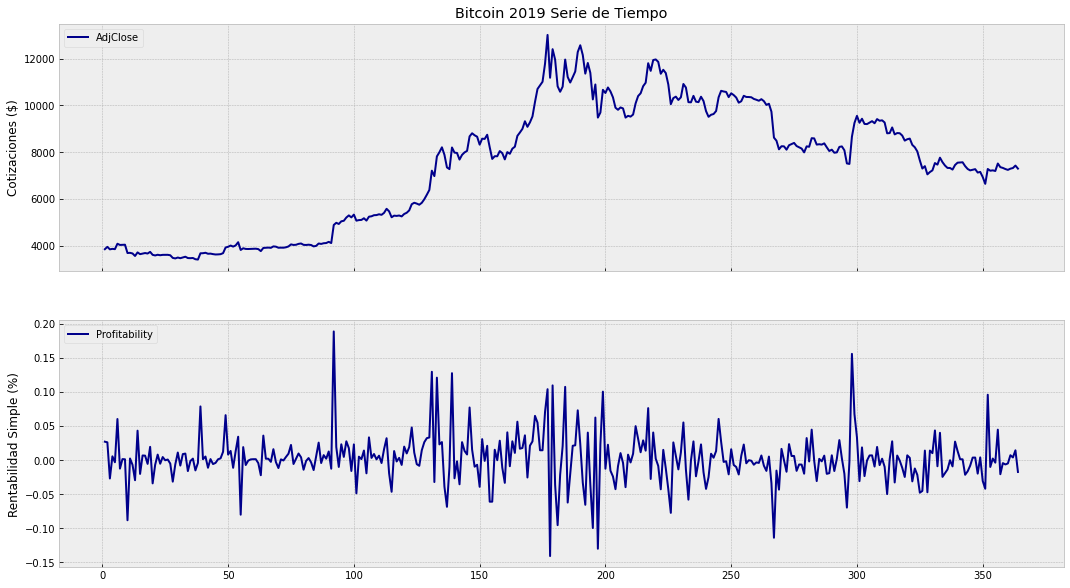

In [13]:
plt.style.use('bmh')
fig, ax = plt.subplots(2, 1, figsize=(18, 10), sharex=True)

df.AdjClose.plot(ax=ax[0], color=['darkblue'])
ax[0].set(title = 'Bitcoin 2019 Serie de Tiempo', ylabel = 'Cotizaciones ($)')
ax[0].legend(loc='upper left')
   
df.Profitability.plot(ax=ax[1], color=['darkblue'])
ax[1].set(ylabel = 'Rentabilidad Simple (%)')
ax[1].legend(loc='upper left')